In [16]:
import numpy as np
import pandas as pd  
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import itertools
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis: Crossroad Traffic

In [17]:
df = pd.read_csv('Crossroad Traffic.csv')
df.head()

,General ID,Detector nr.,Name,Time,Traffic volume (auto/h),Detector occupancy (% of measuring interval),Average speed (km/h)
0,255,1,ig11FD255_D1,7/12/2018 1:00:00 AM,85.022224,1.350278,37.527454
1,255,10,ig11FD255_D10,7/12/2018 1:00:00 AM,0.000000,0.000000,0.000000
2,255,11,ig11FD255_D11,7/12/2018 1:00:00 AM,3.000000,0.075000,13.703540
3,255,12,ig11FD255_D12,7/12/2018 1:00:00 AM,0.000000,0.000000,0.000000
4,255,2,ig11FD255_D2,7/12/2018 1:00:00 AM,124.977776,1.724722,39.606710


In [45]:
df.describe()

,General ID,Detector nr.,Traffic volume (auto/h),Detector occupancy (% of measuring interval),Average speed (km/h)
count,92028.0,92028.000000,92028.000000,92028.000000,92028.000000
mean,255.0,6.500000,300.036203,12.988163,24.968725
std,0.0,3.452071,476.664968,16.994988,14.601690
min,255.0,1.000000,0.000000,0.000000,-1.000000
25%,255.0,3.750000,27.022223,0.500000,14.742618
50%,255.0,6.500000,154.033340,3.224167,24.875259
75%,255.0,9.250000,494.791660,25.022223,37.887119
max,255.0,12.000000,35860.266000,126.962720,143.128110


In [18]:
df = df.drop(df[df['Average speed (km/h)']==-1].index) #delete row with negative Average speed (km/h)

In [47]:
df.describe()

,General ID,Detector nr.,Traffic volume (auto/h),Detector occupancy (% of measuring interval),Average speed (km/h)
count,92027.0,92027.000000,92027.000000,92027.000000,92027.000000
mean,255.0,6.500005,300.039463,12.988304,24.969007
std,0.0,3.452090,476.666532,16.995027,14.601518
min,255.0,1.000000,0.000000,0.000000,0.000000
25%,255.0,3.500000,27.022223,0.500000,14.742659
50%,255.0,7.000000,154.033340,3.224167,24.875277
75%,255.0,9.500000,494.794440,25.022223,37.887192
max,255.0,12.000000,35860.266000,126.962720,143.128110


_______________________________________________
CORRELATION
General ID                                           NaN
Detector nr.                                   -0.230211
Traffic volume (auto/h)                         0.565942
Detector occupancy (% of measuring interval)    1.000000
Average speed (km/h)                           -0.341617
Name: Detector occupancy (% of measuring interval), dtype: float64
_______________________________________________


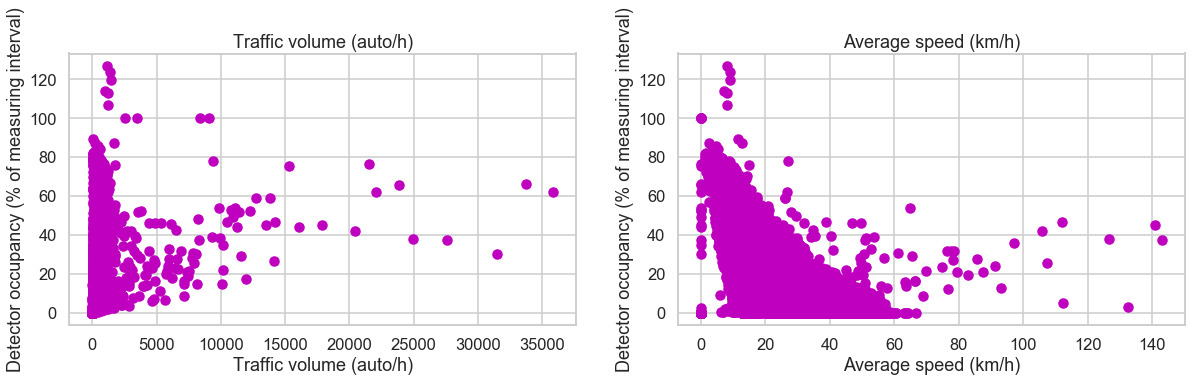

In [48]:
plt.figure(figsize=(20, 5))

features = ['Traffic volume (auto/h)', 'Average speed (km/h)']
target = df['Detector occupancy (% of measuring interval)']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o', color='m')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Detector occupancy (% of measuring interval)')
    
print("_______________________________________________")
print("CORRELATION")
print(df.corr()['Detector occupancy (% of measuring interval)'])
print("_______________________________________________")

- Correlations are useful to see how any two factors in a dataset are related to one another. We see possitive Detector occupancy (% of measuring interval) correlation with Traffic volume (auto/h) (0.565942) and negative with Average speed (km/h)  (-0.341617). We have not see any clear linear relationship.

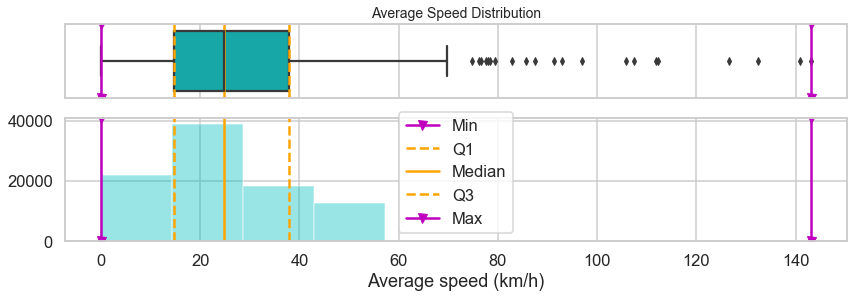

In [21]:
Q1=np.percentile(df['Average speed (km/h)'], 25) 
Q3=np.percentile(df['Average speed (km/h)'], 75)
max=df['Average speed (km/h)'].max()
min=df['Average speed (km/h)'].min()
median=df['Average speed (km/h)'].median()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=(14,4),gridspec_kw= {"height_ratios": (0.3, 0.5)})
sns.boxplot(df['Average speed (km/h)'], ax=ax_box,color='c').set_title("Average Speed Distribution", fontsize=14)
ax_box.axvline(min, color='m', marker="v", linewidth=2.5)
ax_box.axvline(Q1, color='orange', linestyle='--',linewidth=2.5)
ax_box.axvline(median, color='orange', linestyle='-',linewidth=2.5)
ax_box.axvline(Q3, color='orange', linestyle='--',linewidth=2.5)
ax_box.axvline(max, color='m',marker="v",linewidth=2.5)

sns.distplot(df['Average speed (km/h)'], ax=ax_hist,color='c',bins=10, kde=False)
ax_hist.axvline(min, color='m', marker="v", linewidth=2.5)
ax_hist.axvline(Q1, color='orange', linestyle='--', linewidth=2.5)
ax_hist.axvline(median, color='orange', linestyle='-', linewidth=2.5)
ax_hist.axvline(Q3, color='orange', linestyle='--', linewidth=2.5)
ax_hist.axvline(max, color='m', marker="v", linewidth=2.5)

plt.legend({'Min':min,'Q1':Q1,'Median':median,'Q3':Q3,'Max':max,})
ax_box.set(xlabel='')
plt.show()

## Time Series Analysis: Trends and Seasonality

- Trend - a general systematic linear or (most often) nonlinear component that changes over time and does not repeat
- Seasonality - a general systematic linear or (most often) nonlinear component that changes over time and does repeat

In [250]:
df['Time']  = pd.to_datetime(df['Time'])
df = df.set_index('Time')
df.head()

,General ID,Detector nr.,Name,Traffic volume (auto/h),Detector occupancy (% of measuring interval),Average speed (km/h)
Time,,,,,,
2018-07-12 01:00:00,255,1,ig11FD255_D1,85.022224,1.350278,37.527454
2018-07-12 01:00:00,255,10,ig11FD255_D10,0.000000,0.000000,0.000000
2018-07-12 01:00:00,255,11,ig11FD255_D11,3.000000,0.075000,13.703540
2018-07-12 01:00:00,255,12,ig11FD255_D12,0.000000,0.000000,0.000000
2018-07-12 01:00:00,255,2,ig11FD255_D2,124.977776,1.724722,39.606710


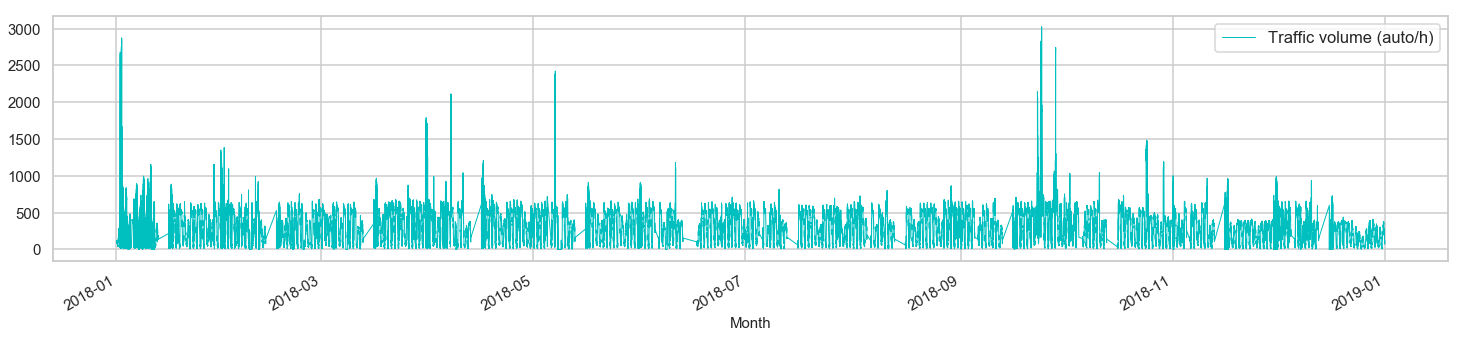

In [15]:
traffic = df[['Traffic volume (auto/h)']]
traffic.rolling(12).mean().plot(figsize=(25,5), color='c', linewidth=1, fontsize=15)
plt.xlabel('Month', fontsize=15);

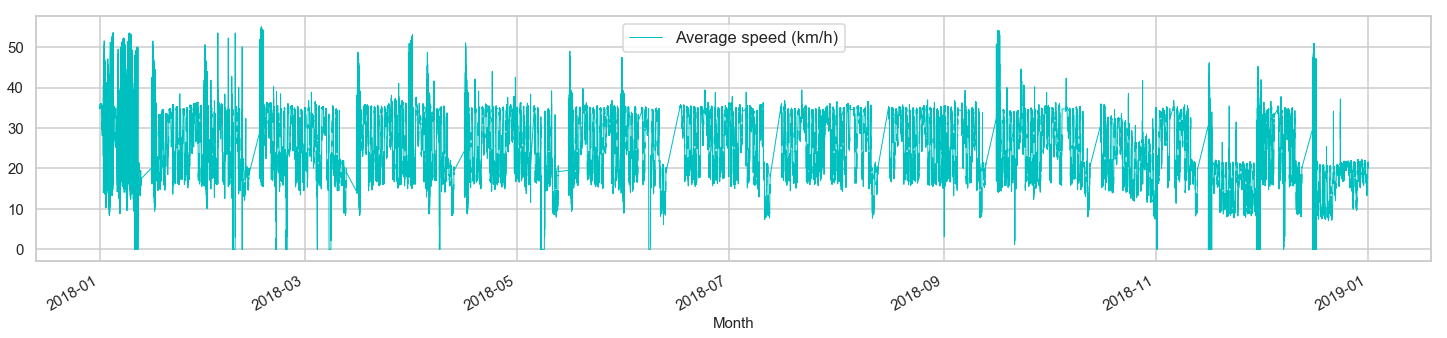

In [46]:
speed = df[['Average speed (km/h)']]
speed.rolling(12).mean().plot(figsize=(25,5), color='c', linewidth=1, fontsize=15)
plt.xlabel('Month', fontsize=15);

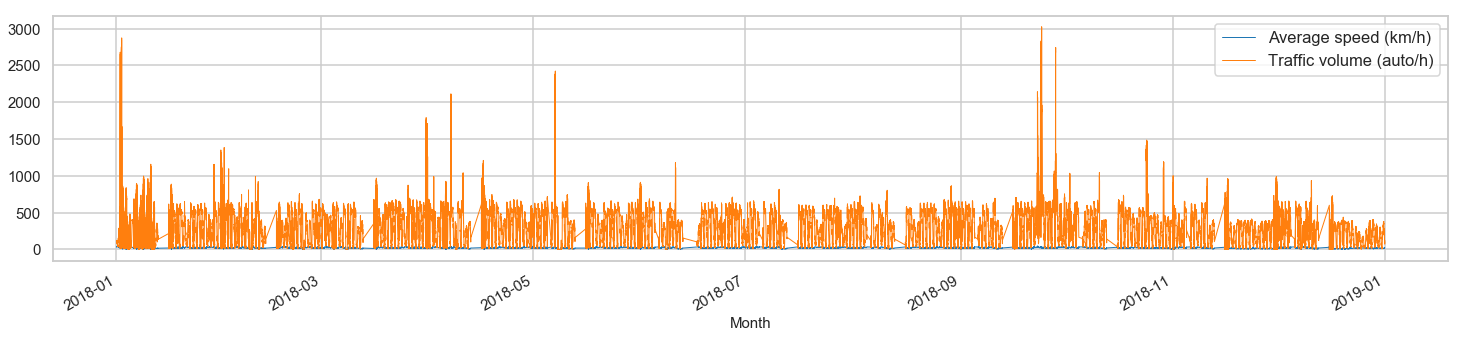

In [52]:
df_rm = pd.concat([speed.rolling(12).mean(), traffic.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(25,5), linewidth=1, fontsize=15)
plt.xlabel('Month', fontsize=15);

## Aggregating Components: trend, seasonality, and residuals

In [53]:
decompfreq = 24*60*7

In [54]:
res = sm.tsa.seasonal_decompose(traffic.interpolate(),
                                freq=decompfreq,
                                model='additive')

In [55]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(150,150))
res.trend.plot(ax=ax1, title='Traffic volume Trend', fontsize=80, color='m')
res.resid.plot(ax=ax2, title='Traffic volume Residuals',fontsize=80, color='m')
res.seasonal.plot(ax=ax3, title='Traffic volume Seasonality',fontsize=80, color='m')

ax1.title.set_size(100)
ax2.title.set_size(100)
ax3.title.set_size(100)

## Resampling

Resampling involves changing the frequency of your time series observations. It can be used to provide additional structure or insight into the learning problem for supervised learning models. The resample method in pandas is similar to its groupby method as you are essentially grouping by a certain time span. 

###### Summary by hour 

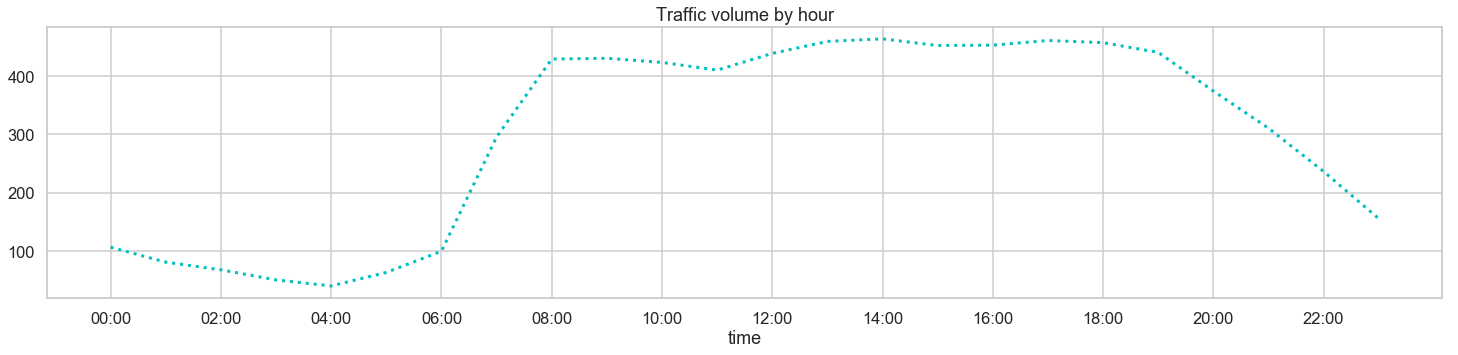

In [33]:
by_time = df.groupby(df.index.time).mean()['Traffic volume (auto/h)']
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'],figsize=(25,5),title='Traffic volume by hour', color='c', linewidth=3);

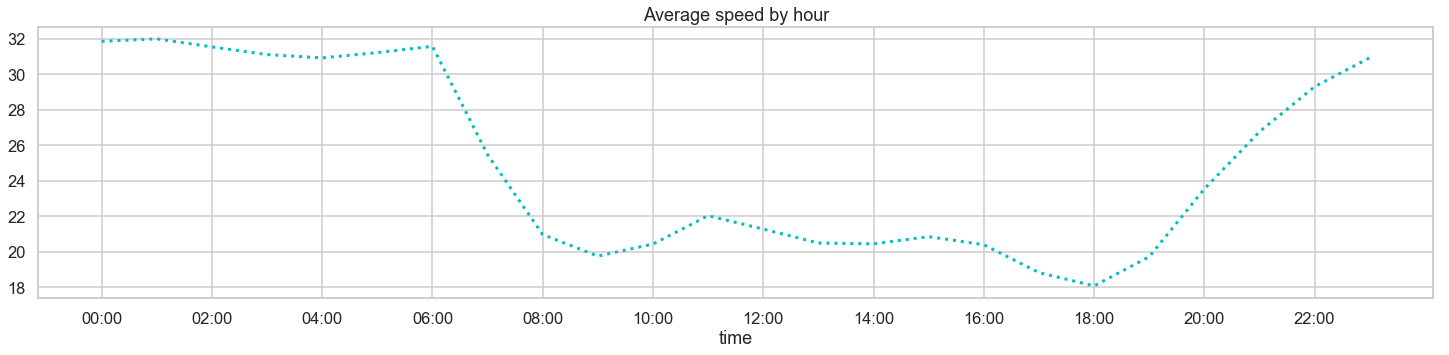

In [114]:
by_time = df.groupby(df.index.time).mean()['Average speed (km/h)']
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'],figsize=(25,5),title='Average speed by hour',color='c', linewidth=3);

###### Summary by weekday

(20, 30)

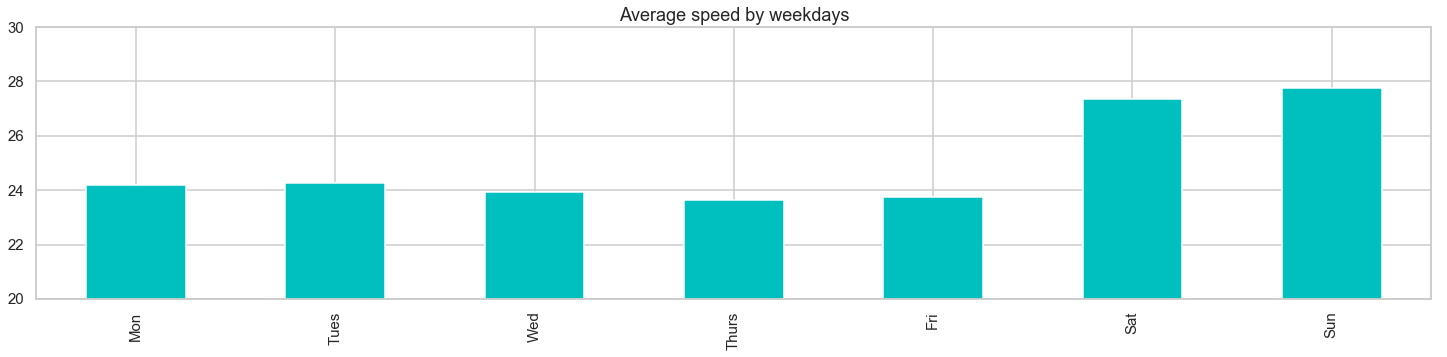

In [123]:
by_weekday = df.groupby(df.index.dayofweek).mean()['Average speed (km/h)']
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(kind='bar',figsize=(25,5), color='c',title='Average speed by weekdays', fontsize=15)
plt.ylim((20,30))

(200, 350)

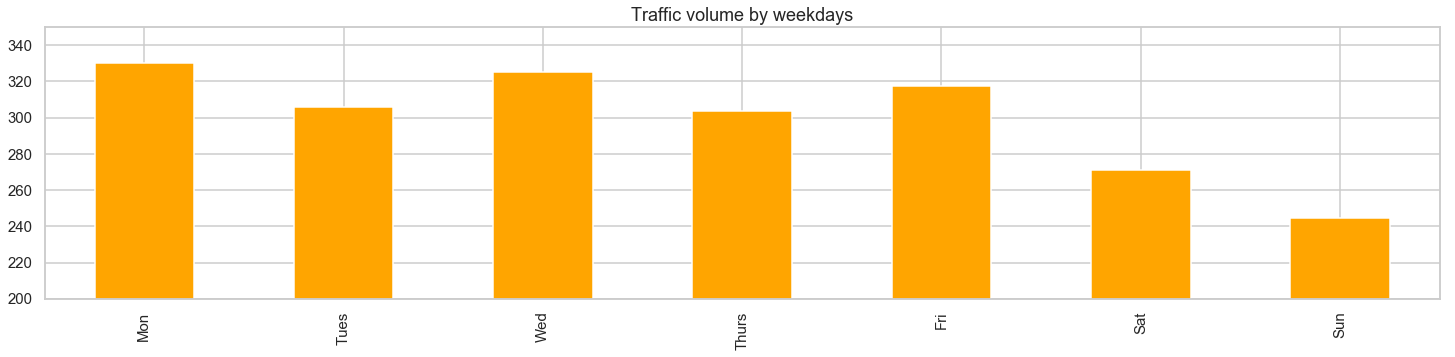

In [122]:
by_weekday = df.groupby(df.index.dayofweek).mean()['Traffic volume (auto/h)']
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(kind='bar',figsize=(25,5), color='orange',title='Traffic volume by weekdays', fontsize=15)
plt.ylim((200,350))

###### Summary by hour on Weekend and Workdays

In [51]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df.groupby([weekend, df.index.time]).mean()['Traffic volume (auto/h)']

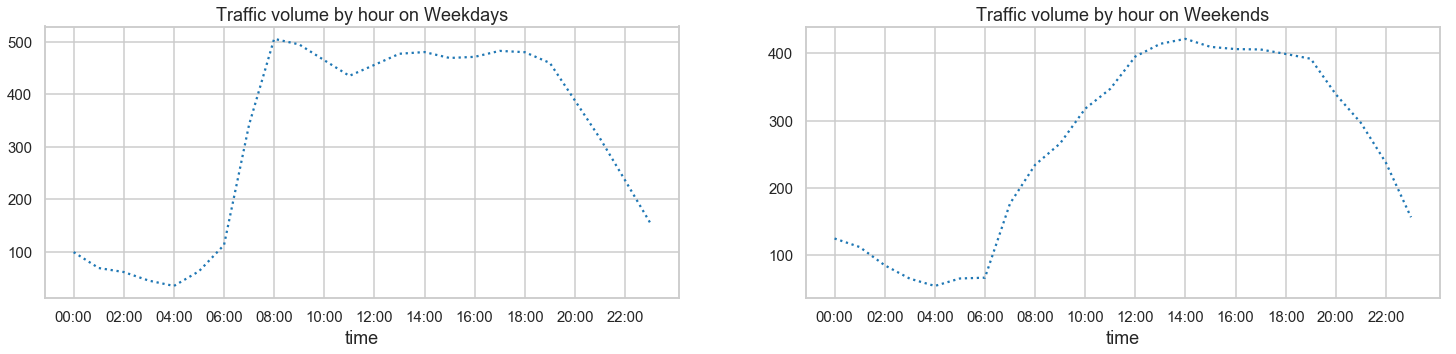

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(25, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Traffic volume by hour on Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'], fontsize=15)
by_time.ix['Weekend'].plot(ax=ax[1], title='Traffic volume by hour on Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'], fontsize=15);

###### Summary by Week

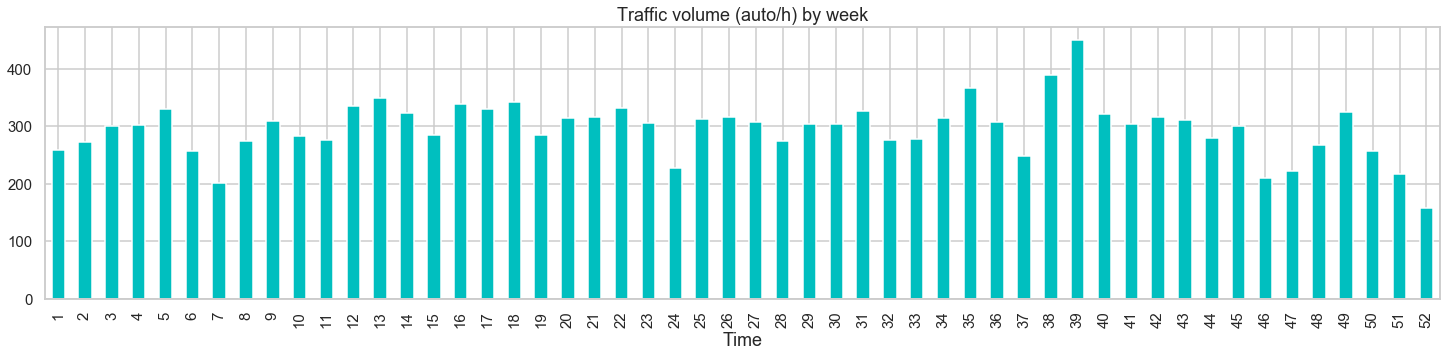

In [53]:
by_week = df.groupby(df.index.week).mean()['Traffic volume (auto/h)']
by_week.plot(kind='bar',figsize=(25,5), color='c',title='Traffic volume (auto/h) by week', fontsize=15)

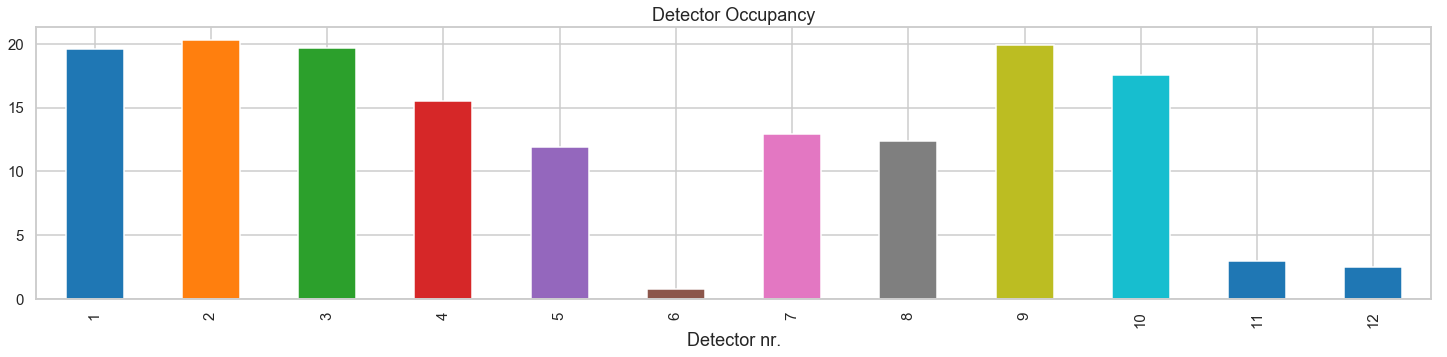

In [116]:
df.groupby('Detector nr.').mean()['Detector occupancy (% of measuring interval)'].plot(kind='bar', figsize=(25,5), title='Detector Occupancy', fontsize=15)


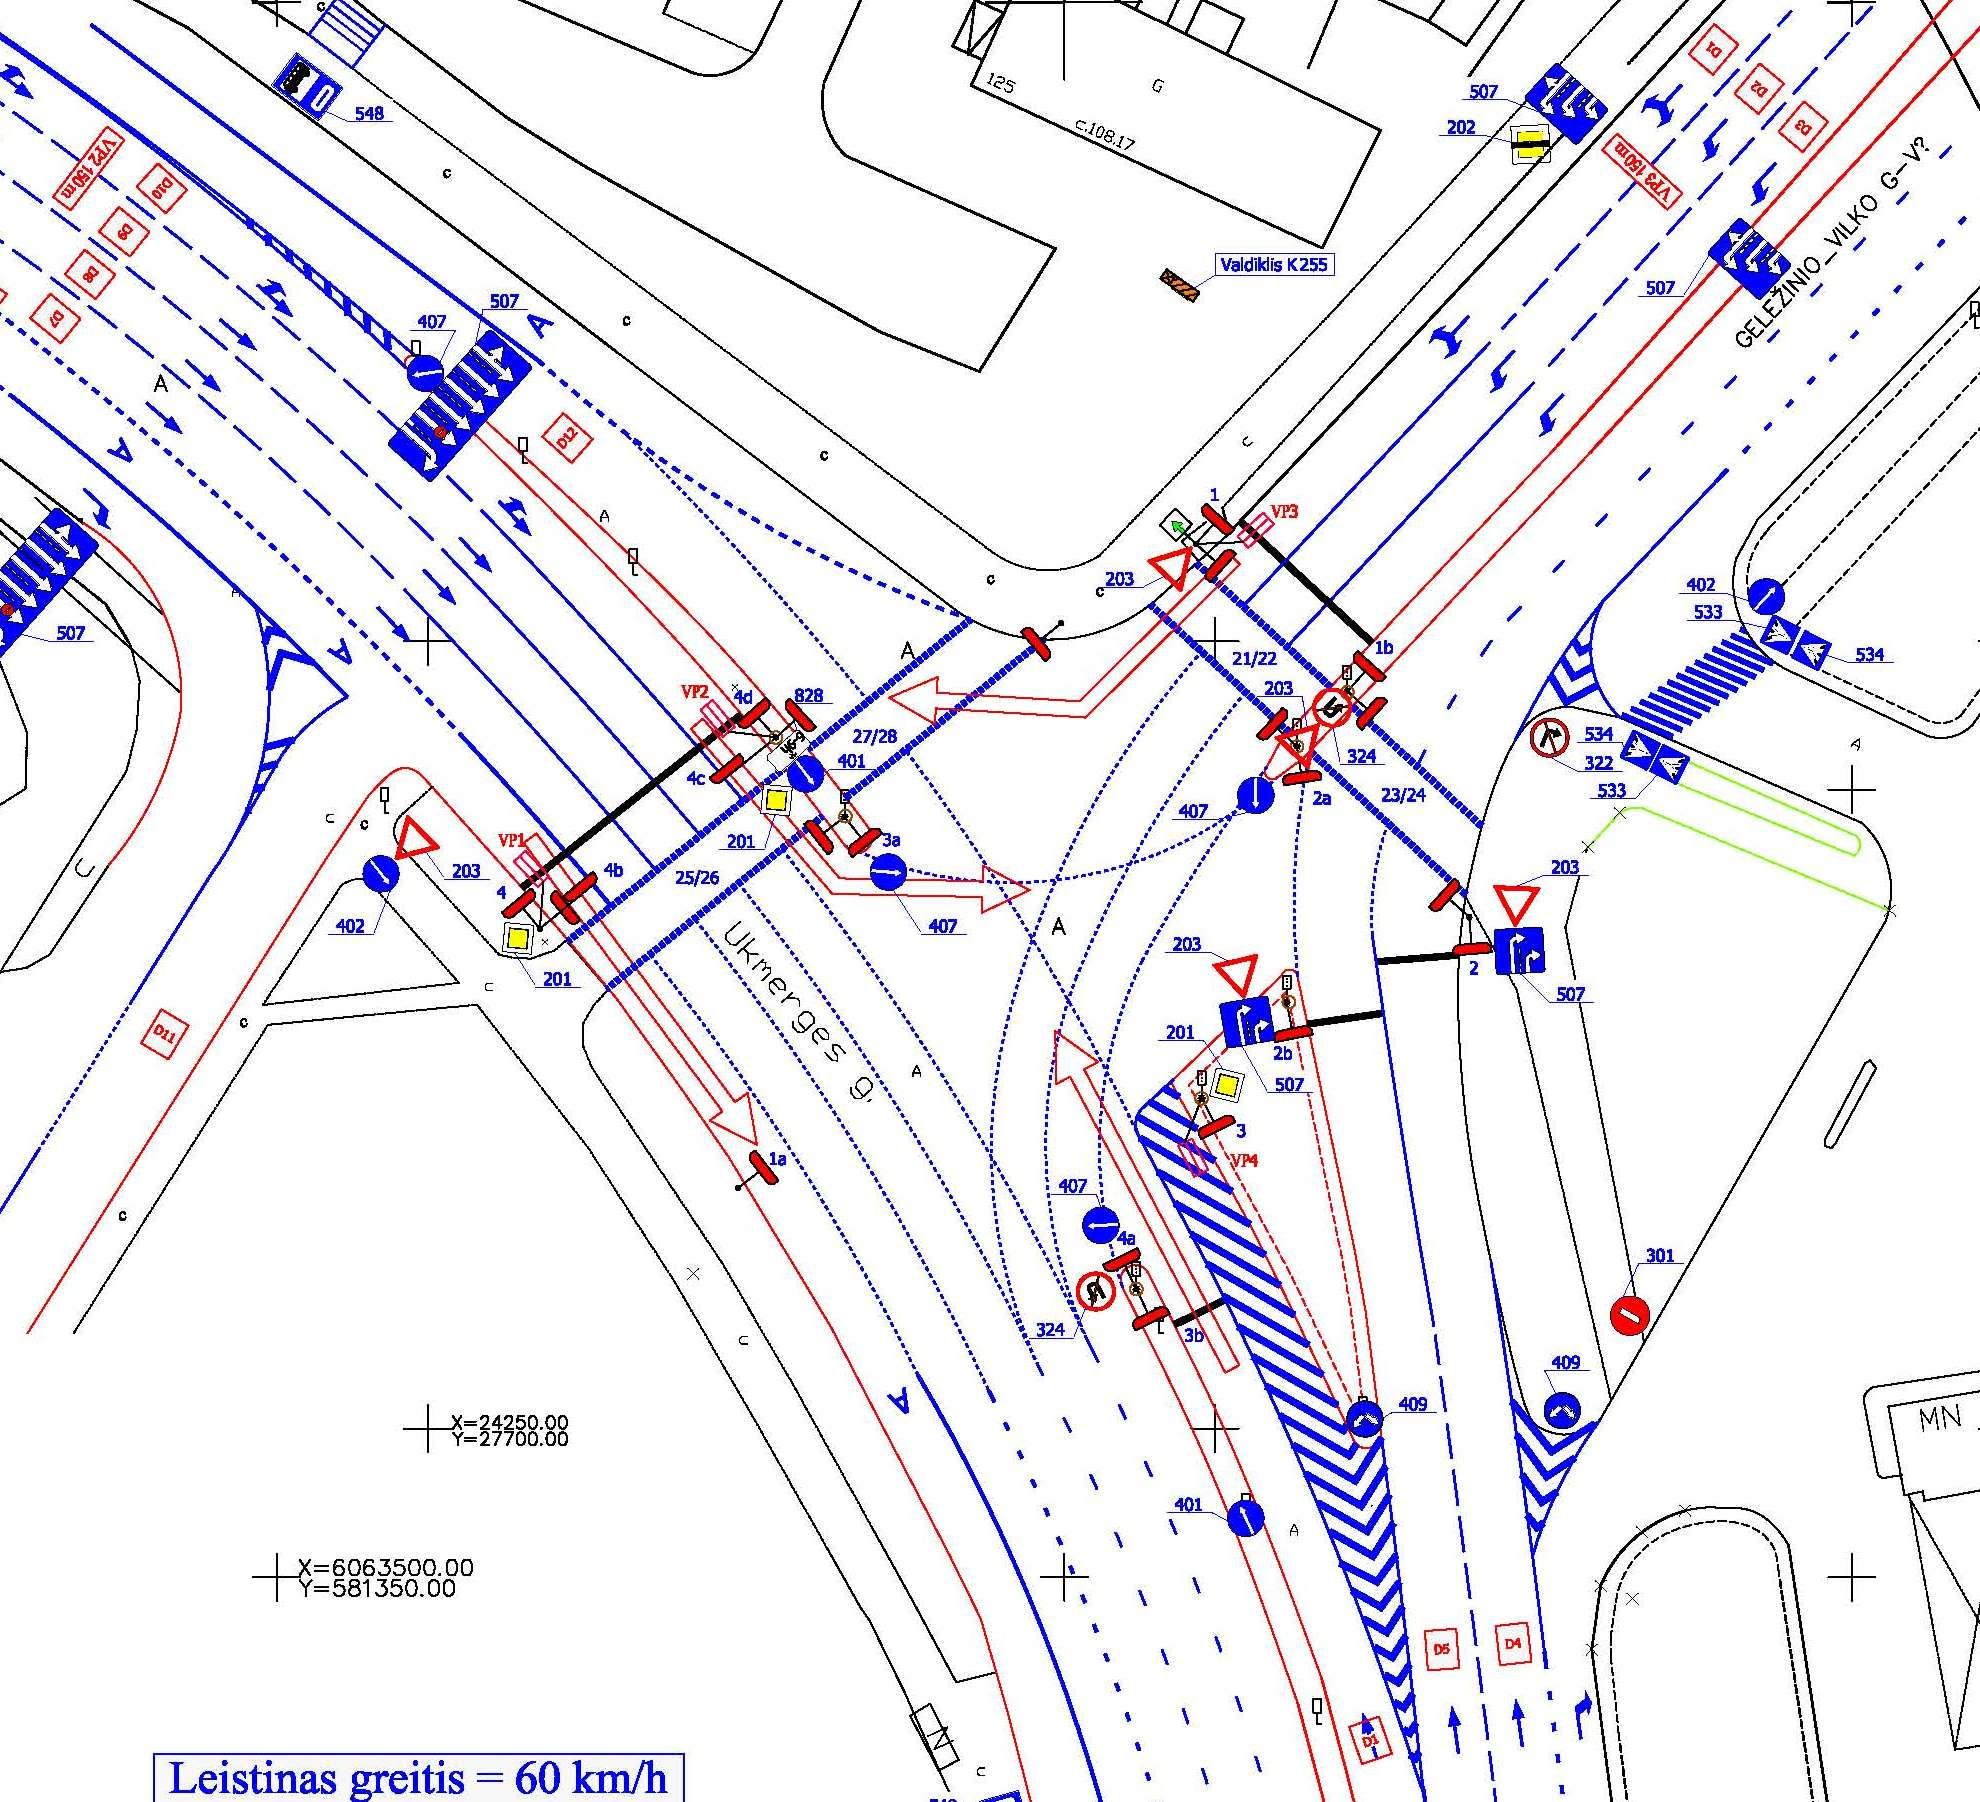

## The ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

In [251]:
# The 'MS' string groups the data in buckets by start of the month
y = df.resample('D').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())


            General ID  Detector nr.  Traffic volume (auto/h)  \
Time                                                            
2018-01-01       255.0           6.5               138.057608   
2018-01-02       255.0           6.5               461.134055   
2018-01-03       255.0           6.5               339.220210   
2018-01-04       255.0           6.5               158.104791   
2018-01-05       255.0           6.5               236.717231   
2018-01-06       255.0           6.5               360.941023   
2018-01-07       255.0           6.5               206.170049   
2018-01-08       255.0           6.5               352.079962   
2018-01-09       255.0           6.5               271.087560   
2018-01-10       255.0           6.5               393.423710   
2018-01-11       255.0           6.5               153.036232   
2018-01-12       255.0           6.5               195.709299   
2018-01-13       255.0           6.5               348.510830   
2018-01-14       255.0   

In [252]:
y=y[['Traffic volume (auto/h)']]

### Parameter Selection for the ARIMA

ARIMA(p,d,q)(P,D,Q)s. (p, d, q) are the non-seasonal parameters, (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. Parameters defines seasonality, trend, and noise in dataset.

- p: Auto-regressive part of the model - the number of lag observations in the model.
- d: Integrated part of the model - the amount of differencing to apply to the time series.
- q: Moving average part of the model - allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.
- s: The number of time steps for a single seasonal period.


In [253]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [254]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5230.89743227962
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4812.240608892517
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4408.05756562173
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4062.98063460095
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4406.612995138383
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4205.442772479885
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4150.616126001629
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4063.328344125514
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4866.678440936872
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4558.2919972530235
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4355.1056407492
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4010.8296145125883
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4356.723894549202
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4154.328430113309
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4115.853470207372
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4009.427250842477
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4395.898509462448
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4242.78496420

The output of our code suggests that SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3988.1676259314404 yields the lowest AIC value. We should therefore consider this to be optimal option out of all the models we have considered.

### Fitting an ARIMA Time Series Model

In [300]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1721      0.044      3.918      0.000       0.086       0.258
ma.L1         -0.9124      0.031    -29.112      0.000      -0.974      -0.851
ar.S.L12      -0.1497      0.062     -2.420      0.016      -0.271      -0.028
ma.S.L12      -0.9759      0.123     -7.947      0.000      -1.217      -0.735
sigma2      6664.0689    763.472      8.729      0.000    5167.692    8160.446


The coef column shows the importance of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight.

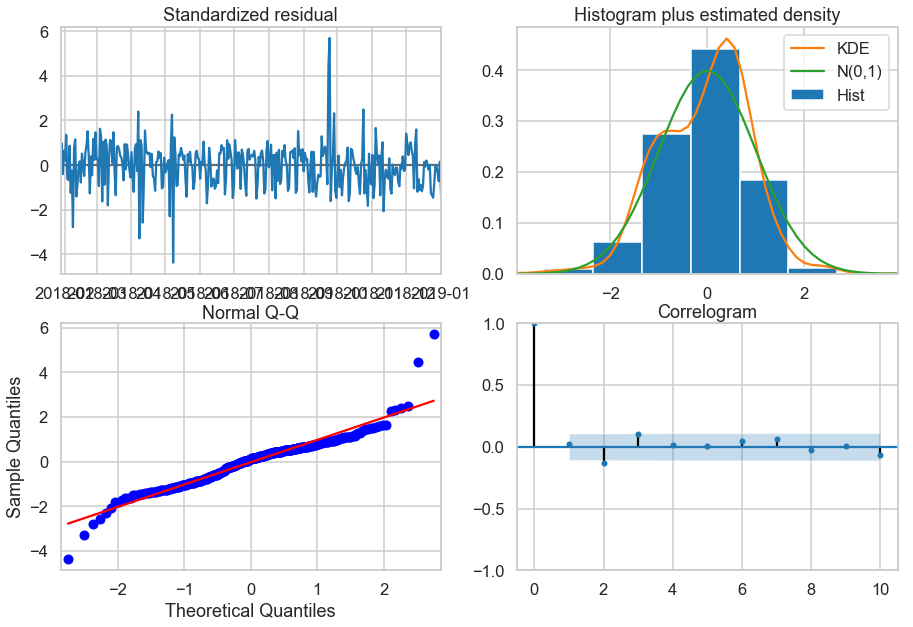

In [315]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

### Validating Forecasts

In [310]:
pred = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=False) 
pred_ci = pred.conf_int()

- The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

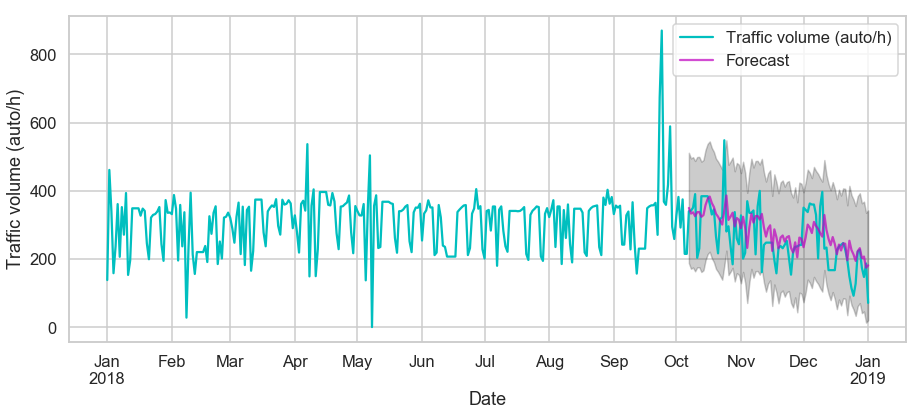

In [292]:
ax = y['2018':].plot(label='observed',color='c', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='Forecast', color='m', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume (auto/h)')
plt.legend()
plt.show()

Overall, our forecasts align with the true values not very well, but showing an overall decrease trend.

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts.

In [293]:
print("R2 score : %.2f" % r2_score(y['2018-10-07':],pred.predicted_mean))
print("Mean squared error: %.2f" % mean_squared_error(y['2018-10-07':],pred.predicted_mean))

R2 score : 0.26
Mean squared error: 5273.87


In [294]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

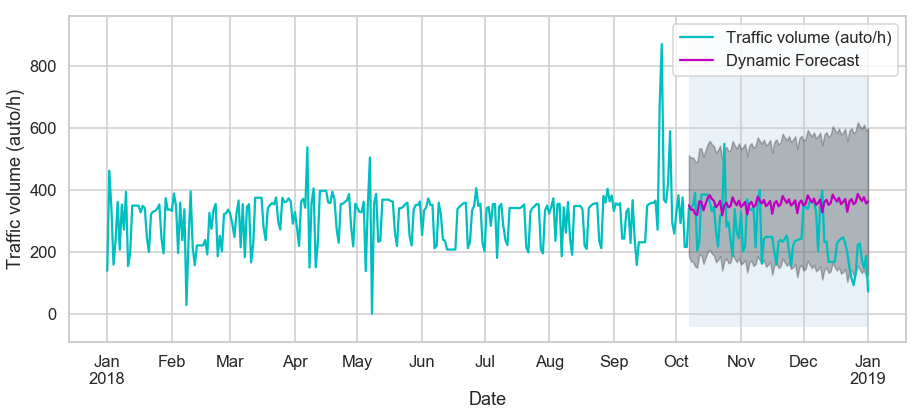

In [308]:
ax = y['2018':].plot(label='observed', color='c', figsize=(15, 6))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', color='m', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-10-07'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume (auto/h)')

plt.legend()
plt.show()

In [296]:
print("R2 score : %.2f" % r2_score(y['2018-10-07':],pred_dynamic.predicted_mean))
print("Mean squared error: %.2f" % mean_squared_error(y['2018-10-07':],pred_dynamic.predicted_mean))

R2 score : -1.31
Mean squared error: 16526.84


### Producing and Visualizing Forecasts

In [297]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

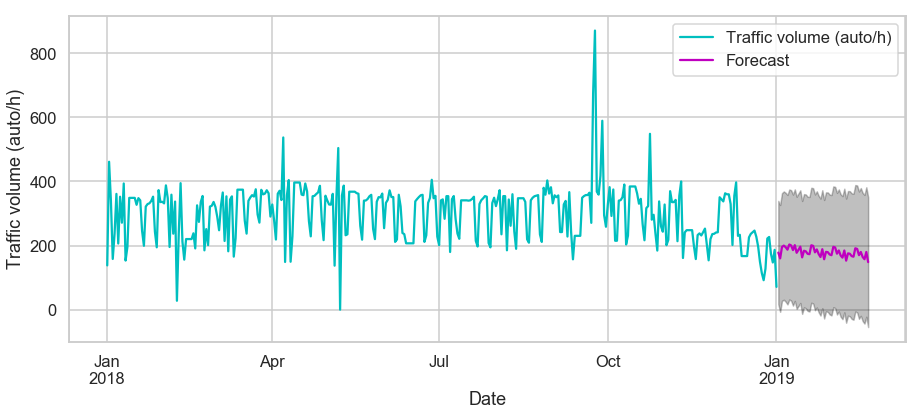

In [309]:
ax = y.plot(label='observed',color='c', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, color='m', label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume (auto/h)')

plt.legend()
plt.show()

Our forecasts show that the time series data should include observations from more than one year to achieve more accurate results. 